<h2>Initialize part</h2>

In [2]:
import seaborn 
#try this three
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/[1h]BTCUSDT.csv')
df2 = pd.read_csv('data/[1h]BTCUSDT.csv')
print(df)

               Start           Stop      Open     Close       Low      High  \
0      1502942400000  1502945999999   4261.48   4308.83   4261.32   4313.62   
1      1502946000000  1502949599999   4308.83   4315.32   4291.37   4328.69   
2      1502949600000  1502953199999   4330.29   4324.35   4309.37   4345.45   
3      1502953200000  1502956799999   4316.62   4349.99   4287.41   4349.99   
4      1502956800000  1502960399999   4333.32   4360.69   4333.32   4377.85   
...              ...            ...       ...       ...       ...       ...   
29471  1609444800000  1609448399999  28897.84  29126.70  28862.00  29139.65   
29472  1609448400000  1609451999999  29126.71  28966.36  28900.79  29169.55   
29473  1609452000000  1609455599999  28966.36  29100.84  28910.19  29143.73   
29474  1609455600000  1609459199999  29100.83  28923.63  28780.00  29110.35   
29475  1609459200000  1609462799999  28923.63  28995.13  28690.17  29031.34   

            Volume  
0        47.181009  
1        

In [125]:
index = [x for x in range(0, len(df["Open"]))]

In [126]:
number_of_predictions = 30
new_index = [(index[-1] + x) for x in range(number_of_predictions)]

In [99]:
data = df["Close"]

<h2>Part with ploting data</h2>

[]

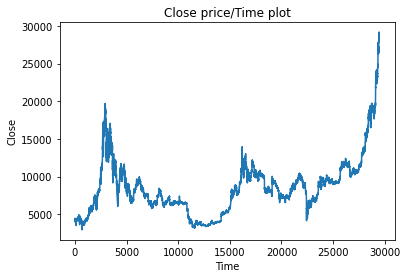

In [54]:
fig, ax = plt.subplots()
ax.plot(index, df["Close"])
ax.set(xlabel='Time', ylabel='Close',
       title='Close price/Time plot')
plt.plot()

[]

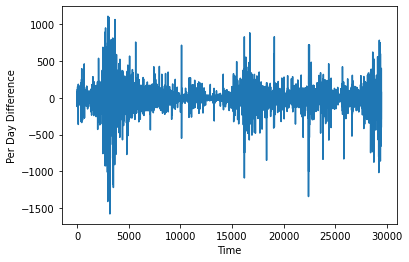

In [48]:
delta_day = []
for i in range(len(df["Open"])):
    delta_day.append(df["Close"][i] - df["Open"][i])
fig, ax = plt.subplots()
ax.plot(index, delta_day)
ax.set(xlabel='Time', ylabel='Per Day Difference')
plt.plot()

<h2>Models for training</h2>

<h3 style="text-align:center">AutoReg</h3>

In [50]:
from statsmodels.tsa.ar_model import AutoReg

In [69]:
model = AutoReg(data, lags=number_of_predictions)
model_fit = model.fit()
# make prediction
autoreg_prediction = model_fit.predict(len(data), len(data)+number_of_predictions-1) 

e:\python\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


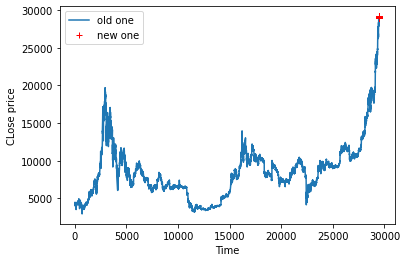

In [72]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,autoreg_prediction,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

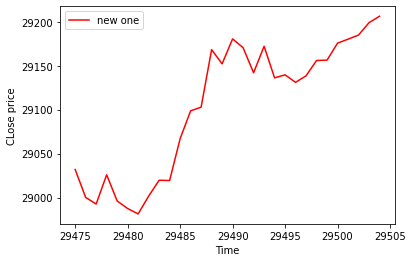

In [75]:
fig, ax = plt.subplots()
line2, = ax.plot(new_index,autoreg_prediction,'r',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

<h3 style="text-align:center">ARIMA</h3>

In [78]:
from statsmodels.tsa.arima.model import ARIMA

In [79]:
model = ARIMA(data, order=(number_of_predictions, 1, 1))
model_fit = model.fit()
arima = []
# make prediction
for i in range(number_of_predictions):
    arima_prediction = model_fit.predict(len(data)+i, len(data)+i)
    arima.append(arima_prediction)

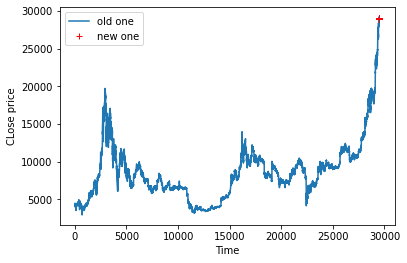

In [80]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,arima,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

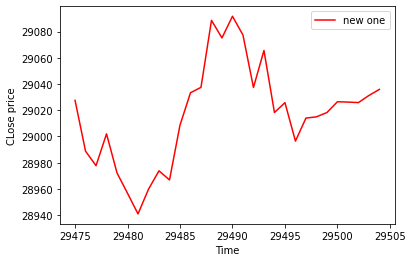

In [81]:
fig, ax = plt.subplots()
line2, = ax.plot(new_index,arima,'r',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

In [96]:
model = ARIMA(data, order=(number_of_predictions, 2, 2))
model_fit = model.fit()
# make prediction
arima2 = []
for i in range(number_of_predictions):
    arima2.append(model_fit.predict(len(data)+i, len(data)+i))

In [93]:
print(arima2)

[29476    29027.539893
dtype: float64, 29477    28988.740184
dtype: float64, 29478    28977.695181
dtype: float64, 29479    29001.987557
dtype: float64, 29480    28972.141422
dtype: float64, 29481    28956.67613
dtype: float64, 29482    28940.920892
dtype: float64, 29483    28959.775065
dtype: float64, 29484    28973.78495
dtype: float64, 29485    28966.823053
dtype: float64, 29486    29008.600872
dtype: float64, 29487    29033.306006
dtype: float64, 29488    29037.431837
dtype: float64, 29489    29088.518097
dtype: float64, 29490    29075.121695
dtype: float64, 29491    29091.64246
dtype: float64, 29492    29077.296415
dtype: float64, 29493    29037.333275
dtype: float64, 29494    29065.533314
dtype: float64, 29495    29018.229216
dtype: float64, 29496    29025.776163
dtype: float64, 29497    28996.450864
dtype: float64, 29498    29013.971217
dtype: float64, 29499    29014.946978
dtype: float64, 29500    29018.217205
dtype: float64, 29501    29026.444277
dtype: float64, 29502    29026

In [ ]:
model = ARIMA(data, order=([x for x in range(number_of_predictions)], 2, [x for x in range(number_of_predictions)]))
model_fit = model.fit()
# make prediction[x for x in range(number_of_predictions)]
arima2 = []
for i in range(number_of_predictions):
    arima2.append(model_fit.predict(len(data)+i, len(data)+i))

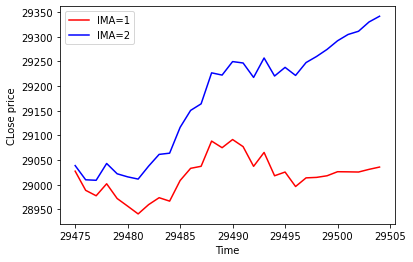

In [97]:
fig, ax = plt.subplots()
line2, = ax.plot(new_index,arima,'r',label="IMA=1")
line1, = ax.plot(new_index,arima2,'b',label="IMA=2")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

<h3 style="text-align:center">SimpleExpSmoothing</h3>

In [43]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [123]:
model = SimpleExpSmoothing(data,initialization_method='heuristic')
model_fit = model.fit(smoothing_level=0.7,optimized=True,use_brute=True,method="bh")
#smoothing_level = max 2 working - futher will be nan; use_brute - for start vallues
#Method "bh" in doc listed as quickest
simp_exp = model_fit.predict(number_of_predictions)

e:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [ ]:
fit3 = SimpleExpSmoothing(data, initialization_method="estimated").fit()
fcast3 = fit3.forecast(number_of_predictions)
fit1 = SimpleExpSmoothing(data, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(number_of_predictions)

ValueError: x and y must have same first dimension, but have shapes (30,) and (29446,)

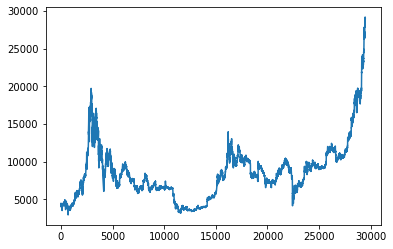

In [124]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,simp_exp,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

<h3 style="text-align:center">ExponentialSmoothing</h3>

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [100]:
model = ExponentialSmoothing(data)
model_fit = model.fit(smoothing_level=0.2)
win_exp = []
# make prediction



29476    28919.135718
dtype: float64
29477    28919.135718
dtype: float64
29478    28919.135718
dtype: float64
29479    28919.135718
dtype: float64
29480    28919.135718
dtype: float64
29481    28919.135718
dtype: float64
29482    28919.135718
dtype: float64
29483    28919.135718
dtype: float64
29484    28919.135718
dtype: float64
29485    28919.135718
dtype: float64
29486    28919.135718
dtype: float64
29487    28919.135718
dtype: float64
29488    28919.135718
dtype: float64
29489    28919.135718
dtype: float64
29490    28919.135718
dtype: float64
29491    28919.135718
dtype: float64
29492    28919.135718
dtype: float64
29493    28919.135718
dtype: float64
29494    28919.135718
dtype: float64
29495    28919.135718
dtype: float64
29496    28919.135718
dtype: float64
29497    28919.135718
dtype: float64
29498    28919.135718
dtype: float64
29499    28919.135718
dtype: float64
29500    28919.135718
dtype: float64
29501    28919.135718
dtype: float64
29502    28919.135718
dtype: float64
2

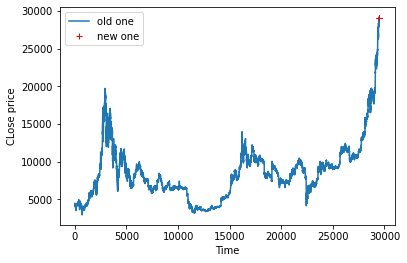

In [64]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,win_exp,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

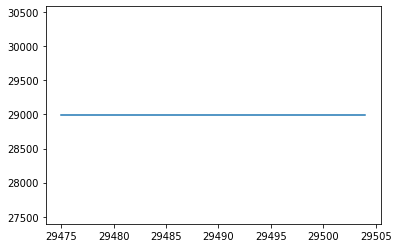

In [65]:
fig,ax = plt.subplots()
line, = ax.plot(new_index,win_exp)
plt.show()

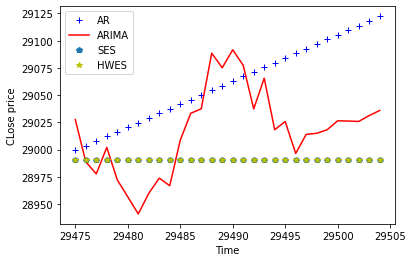

In [66]:
fig, ax = plt.subplots()
line1, = ax.plot(new_index,AR,'b+',label="AR")
line2, = ax.plot(new_index,arima,'r',label="ARIMA")
line3, = ax.plot(new_index,simp_exp,'p',label="SES")
line4, = ax.plot(new_index,win_exp,'y*',label="HWES")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()